In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nengo
from nengo.utils.matplotlib import rasterplot
import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
def prettify():
    sns.despine()
    plt.tight_layout()

WARNING  py.warnings: /usr/local/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)

WARNING  py.warnings: :0: FutureWarning: IPython widgets are experimental and may change in the future.




# How to build a brain <br> with Python

### Trevor Bekolay

The human brain is an amazing computing device.
It weighs about 2 kilograms,
is composed of around 86 billion neurons,
on the order of a quadrillion connections between neurons,
and consumes about 20 watts of power.
Yet it's directly responsible for everything
humans have accomplished,
including creating computers,
and Python, which is why we're here today.
I'm a theoretical neuroscientist,
which means that I build computer
simulations of brains.
Today, I want to tell you how we use Python
to create and run those simulations.

<img src="img/feynman.png" class="center" width="80%">

<img src="img/astroboy.svg" class="inline" width="35%">
<img src="img/hal.svg" class="inline" width="25%">
<img src="img/skynet.svg" class="inline" width="25%">

It's worth first talking about why we want to model the brain.
The first reason is to understand it.
Shortly before his passing,
Richard Feynman wrote:
"What I cannot create, I do not understand."
We think that the best way to understand
how the brain works is to try to
do what the brain does,
under the same types of constraints that
the brain works under.

The second reason to model the brain is
to build better artificial intelligences.
There are both optimistic and pessimistic
examples of AIs in science fiction.
I think what worries most people,
and what makes things like Hal and Skynet
seem plausible,
is that these intelligences are not brain-like;
they're magic, mysterious, different types
of intelligence that we can't reason with or about.
I hope to convince you that this type of
emergent superintelligence is not realistic;
we have to engineer intelligence,
it won't just happen,
and that means we know a lot about it
and can reason with it.

# Neural simulators

0. Emulate neurobiology.
0. Operate in continuous time.
0. Communicate with spikes.

<img src="img/convnet.jpg" class="center" width="85%">

We're not going to build a physical brain,
we're going to simulate it.
Programs that simulate neural systems
like the brain are called neural simulators.
The main goal of a neural simulator
is to emulate neurobiology,
at some level of abstraction.
In order to do that,
these simulations happen
in continuous time,
and they communicate with spikes.

I'll explain more what that means
shortly, but first I want to
contrast neural simulators to the
artificial neural networks
employed in AI.
ANNs have evolved into
multilayered so-called Deep Learning networks
that Facebook and Google
are using now for image and speech recognition.
Artifical Neural Networks are sophisticated
statistical tools,
but they do not attempt to emulate neurobiology;
they work in discrete rather than continuous time;
and they don't use spikes to communicate.

http://www.ais.uni-bonn.de/deep_learning/

<img src="img/neuron.png" class="center">

In [85]:
!neurondemo

NEURON -- VERSION 7.3 ansi (1078:2b0c984183df) 2014-04-04
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2014
See http://www.neuron.yale.edu/neuron/credits

loading membrane mechanisms from /usr/local/Cellar/neuron/7.3/share/nrn/demo/release/x86_64/.libs/libnrnmech.so
Additional mechanisms from files
 cabpump.mod cachan1.mod camchan.mod capump.mod invlfire.mod khhchan.mod mcna.mod nacaex.mod nachan.mod release.mod
oc>

I want to begin with one of the first neural simulators,
which is still actively developed and used today,
called NEURON. It's implemented mostly in C
with Python bindings.
NEURON was how I was introduced to a lot of
the elements of neuroscience,
since it does a very good job of emulating
real biological neurons.
Let's start with the demo that comes with NEURON.

You can see right off the bat,
this is an old program,
copyright 1984,
which is before I was born.
Let's start with the Pyramidal demo
to get introduced to neurobiology.
Here we can see some of the parts of a neuron.
These processes around the outside here
are called dendrites, and they are essentially
the inputs to the cell;
there can be many dendrites for each cell.
The dendrites all converge onto
the body of the cell, which is called the soma.
And then every cell has a single output process
called an axon, which can also branches out.
So, you can think of a neuron essentialy as
a function that takes in many inputs --
through its dendrites --
and produces a single output,
through its axon.

Right now,
NEURON is doing a "current clamp" experiment,
so you can see the "IClamp" here,
"I" stands for current,
which mimics actual neuroscientific experiments.
There is a simulated electrode, here in the soma
at the blue dot,
and it's delivering a pulse of current.
If we run this experiment,
we can see the voltage
of the cell plotted over time.
So, the y-axis here is membrane voltage,
and the x-axis here is time.
In almost all of our plots, in fact,
the x-axis will be time,
because neural simulators
operate in continuous time.
Our other rule is also shown here;
this quick up and down movement
is called a spike,
and it's how neurons communicate.
This spike will travel down the axon
and pass on some information to other neurons.

We can move where we're injecting current,
so let's inject current at a dendrite,
and when we run it again,
there's no longer any spike.

There are a ton of other parameters
we can play around with here
to learn more about neurons,
but let's do this in Python.

In [49]:
import neuron

soma = neuron.h.Section()
soma.L = 40  # Length in um
soma.diam = 20  # Diameter in um
soma.insert('hh')

dendrite = neuron.h.Section()
dendrite.L = 150
dendrite.diam = 3
dendrite.insert('pas')

dendrite.connect(soma, 0, 1);

In [50]:
stim = neuron.h.IClamp(soma(0.5))
stim.delay = 0
stim.amp = 1  # Amplitude in nA
stim.dur = 500

rec_t = neuron.h.Vector()
rec_t.record(neuron.h._ref_t)

rec_v = neuron.h.Vector()
rec_v.record(soma(0.5)._ref_v);

I'll do a much simplified model here,
just a soma and a single dendrite.
We create them by makng Section objects,
and setting their parameters accrodingly.
The soma has a length of 40 micrometers,
and a diameter of 20 micrometers.
This line inserts a set of ion channels.
The dendrite has a length of 150 micrometers
and diameter 3 micrometers.
Then we connect them together.

Next, we set up our current clamp experiment,
injecting 1 nanoamp of current for 500 milliseconds,
directly into the soma.
We the set up what NEURON calls vectors
to record the time (ref_t)
and the voltage (ref_v).

In [51]:
neuron.h.finitialize(-60)
neuron.init()
neuron.run(500)

In [52]:
import numpy as np
times = np.array(rec_t)
voltages = np.array(rec_v)

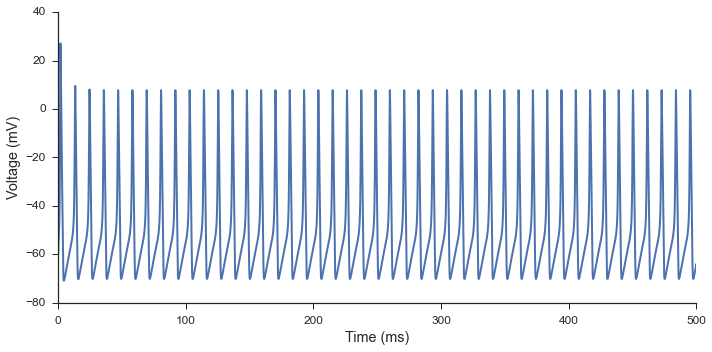

In [53]:
import matplotlib.pyplot as plt
plt.plot(times, voltages)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.xlim(right=500)
prettify()

We set the initial voltage,
and run the simulation for 500 milliseconds.

At this point, we can take the data from NEURON
and put them in NumPy arrays.

And then we can plot the data with Matplotlib.
This neuron is now quite active,
spiking a lot in these 500 milliseconds.
If you have time,
you can a lot of time playing around
with all of the parameters
to see how each one
affects the neural activity.

So how does NEURON work?
Well, the way NEURON makes these simulations
is through some built-in equations
that define how the neuron
responds to injected current.
They're based on the physics
of electrical circuits.
There are more and less detailed ways
to emulate those electrical physics.
It is possible in NEURON to
specify those equations,
but unfortunately
it can't be specified in Python.

<code><pre>
TITLE Anomalous rectifier

UNITS {
        (mA) = (milliamp)
        (mV) = (millivolt)
} 
NEURON {
        SUFFIX Khcvode
  	  USEION k WRITE ik
        RANGE  gkbar, gk, ik
} 
INDEPENDENT {t FROM 0 TO 1 WITH 1 (ms)}
PARAMETER {
        v (mV)
        celsius = 37 (degC)
        mon = 1        
	  man = 1
	  nan = 1
        gkbar = .0003 (mho/cm2)
        ekcvode	= -30 (mV)

} 
DERIVATIVE state {  :Computes rate and other constants at current v.
                      :Call once from HOC to initialize inf at resting v.
        q10 = 3^((celsius - 37)/10)        	
                :"m" potassium activation system
        minf = 1/(1+exp((v+78)/7))
	  mtau= 38/q10
        ntau = 319/q10
        m' = mon * ( (man * 0.8 * (minf-m)/mtau) + (nan * 0.2 * (minf-m)/ntau) )     
}
</pre></code>

Here's an example of the syntax.
It's not actually too bad,
but you have to compile these
files separately before
rerunning a Python script,
and keeping both syntaxes in working memory
is rather challenging.
It would be nice if everything was in Python.

<img src="img/brian.png" class="center">

Brian is a neural simulator
implemented entirely in Python.
It puts the equations behind each neuron
front and center.

In [1]:
import brian2 as br

# Parameters
C = 281 * br.pF
gL = 30 * br.nS
taum = C / gL
reset_v = -70.6 * br.mV
VT = -50.4 * br.mV
DeltaT = 2 * br.mV
Vcut = VT + 5 * DeltaT
tauw = 144*br.ms
a = 4*br.nS
b = 0.0805*br.nA
Vr = -70.6*br.mV

eqs = """
dvm/dt = (gL*(reset_v - vm) + gL*DeltaT*exp((vm - VT)/DeltaT) + I - w)/C : volt
dw/dt = (a*(vm - reset_v) - w)/tauw : amp
I : amp
"""

Brian code is somewhat harder to read
than NEURON code,
but it's more flexible as the
equations are inline with the parameters.
Brian also explicitly tracks units,
which is important for validation.
You can see, for example,
that the reset voltage is in millivolts.

In [2]:
neuron = br.NeuronGroup(1, model=eqs, threshold='vm>Vcut', reset="vm=Vr; w+=b")
neuron.vm = reset_v
neuron.I = 1.5*br.nA

In [3]:
voltage = br.StateMonitor(neuron, 'vm', record=0)
spikes = br.SpikeMonitor(neuron)
br.run(500 * br.ms)

In [4]:
vm = voltage[0].vm[:]
for t in spikes.t:
    i = int(t / br.defaultclock.dt)
    vm[i] = 20*br.mV

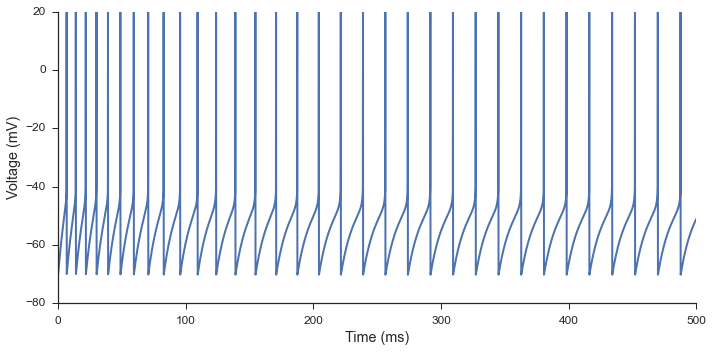

In [7]:
plt.plot(voltage.t / br.ms, vm / br.mV)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
prettify()

We create a single neuron,
and set its initial voltage,
and input current.

We record the voltage trace and when it spikes,
and run it for 500 milliseconds.

Here's what the voltage trace looks like when we plot it.

- [NEST (NEural Simulation Tool)](http://www.nest-initiative.org/index.php/PyNEST)
- [MOOSE (Multiscale Object-Oriented Simulation Environment)](http://journal.frontiersin.org/article/10.3389/neuro.11.006.2008/abstract)
- [GENESIS (GEneral NEural SImulation System)](http://genesis-sim.org/userdocs/tutorial-python-scripting/tutorial-python-scripting.html)
- [NEVESIM (Neural EVEnt-based SIMulator)](http://journal.frontiersin.org/article/10.3389/fninf.2014.00070/abstract)
- [PCSIM (Parallel neural Circuit SIMulator)](http://www.lsm.tugraz.at/pcsim/)
- [Brainlab](http://journal.frontiersin.org/article/10.3389/neuro.11.016.2009/abstract)
- [Topographica](http://journal.frontiersin.org/article/10.3389/neuro.11.008.2009/abstract)
- [PyNN](http://neuralensemble.org/PyNN/)
- ...

NEURON and Brian aren't the only neural simulators
that work in Python; here are 8 more projects
that simulate biologically realistic neurons.
They all have their strength and weaknesses.
But to me they're not very satisfying.
This talk is about how to build *brain*,
but these tools are focused on building *neurons*.
We have 86 billion neurons, but a quadrillion
connections between them;
the brain is about how neurons are connected.

So, let me do a quick poll of the audience.
My question is how do we scale these neurons up to brains?
How can we use neurons to make a human-scale intelligences?
Three options.

Option A:
We take 86 billion neurons, like we've simulated already,
and connect them completely randomly.

Option B:
We take 86 billion neurons,
and connect them according to the statistics
of the brain; so, a lot of short-range connections,
and relatively few long-range connections.

Option C:
We take 86 billion neurons,
and connect them in a carefully sculpted way
to do specific information processing tasks.

Hands up for A, random connections.
Hands up for B, connections according to statistics.
Hands up for C, manually connect them.

It seems like most of you agree
that C is the only thing that seems like it might work,
but it's very time-consuming.
We need to build tools to figure out
how to connect neurons together to do
specific tasks.

<img src="img/nengo.png" class="inline" width="40%">
$\quad$
<img src="img/nef.png" class="inline" width="40%">

So, let me introduce Nengo.
Nengo is a neural simulator that focuses on
connecting groups of neurons together
using a theoretical framework called
the Neural Engineering Framework,
or NEF for short.
Like other neural simulators,
we are still emulating neurobiology,
we are still operating in continuous time,
and we're still communicating with spikes.
But our focus is on scaling up neural simulators
to the scale of brains.

spike raster

So, instead of looking at the activity of a single neuron,
we're instead looking at the activity from many neurons.
This is called a spike raster;
each vertical tick is a spike,
and each row contains the spikes for one neuron.
There's clearly some information being represented here.
But how exactly do hundreds, or thousands of neuron
cooperate to represent and process information?

One tuning curve

Well, fortunately, neuron don't respond
in entirely arbitrary ways.
Everything that you think and experience
has some neural correlate.
Let's use as an example taste.
You can easily tell when something is sweet,
and also how sweet it is, relative to other foods.
You can record for neurons that are sensitive
to sweetness, for example,
and you might get a result like this.
So as the taste stimulus is more sweet,
there's more neural activity
in this particular cell.
If we have many cells that are sensitive
to sweetness, then their collective
activity can give us a good estimate
of how sweet the stimulus is.

http://www.ncbi.nlm.nih.gov/books/NBK11116/

# Neural code $\approx$ binary code

<div class="fragment fade-out" data-fragment-index="1">

$$x = 13$$

$$a = 1101$$

$$d = 2^3 2^2 2^1 2^0$$

$$\hat{x} = 1 \times 8 + 1 \times 4 + 0 \times 2 + 1 \times 1 = 13$$

</div>

<div class="fragment fade-in" data-fragment-index="1" style="position:relative; top:-90px;">

$$x = 0.3$$

$$a = 23 Hz, 60 Hz, 3 Hz, ...$$

$$d = d_0, d_1, d_2, ...$$

$$\hat{x} = 23 \times d_0 + 60 \times d_1 + 3 \times d_2 + ... \approx 0.3$$

</div>

A good analogy for how this works
is to think of this type of neural code
as being similar to binary code.

As most of us here know,
binary is essentially how computers
represent information.
Let's say we want to represent the value 13.
We can encode this as the binary number 1101.
We can decode this back to decimal
by essentially weighting each of these digits
with the power of two they encode.

In the NEF,
we consider the neural code to be very similar.
You can think of each bit in the binary case
as a neuron. In the binary case,
each bit encodes a single value,
and it's either true or false.
In the neural case,
each neuron also encodes a value,
but it's not just true or false;
the relatively amount of neural activity tells
us some information about that particular value.
Then decoding is essentially the same;
we weight the neural activity by certain weights
to recover the originally encoded value.

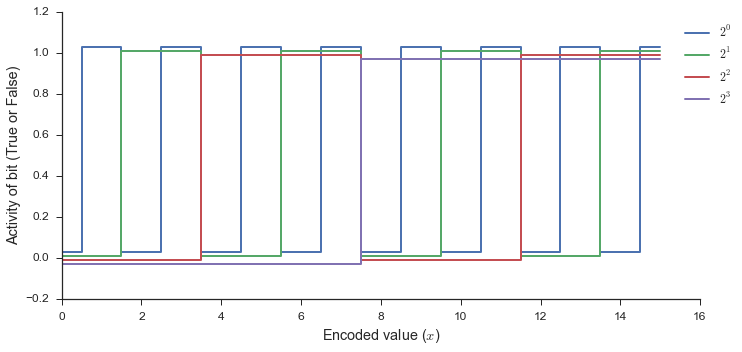

In [78]:
x = np.arange(16)
bit3 = np.array((x % 16) >= 8, dtype=float)
bit2 = np.array((x % 8) >= 4, dtype=float)
bit1 = np.array((x % 4) >= 2, dtype=float)
bit0 = np.array((x % 2) >= 1, dtype=float)

plt.plot(x, bit0 + 0.03, drawstyle="steps-mid", label="$2^0$")
plt.plot(x, bit1 + 0.01, drawstyle="steps-mid", label="$2^1$")
plt.plot(x, bit2 - 0.01, drawstyle="steps-mid", label="$2^2$")
plt.plot(x, bit3 - 0.03, drawstyle="steps-mid", label="$2^3$")
plt.ylabel('Activity of bit (True or False)')
plt.xlabel('Encoded value ($x$)')
plt.legend(loc=2, bbox_to_anchor=(0.96, 1), fontsize='large')

prettify()
plt.savefig('img/binarycode.svg')

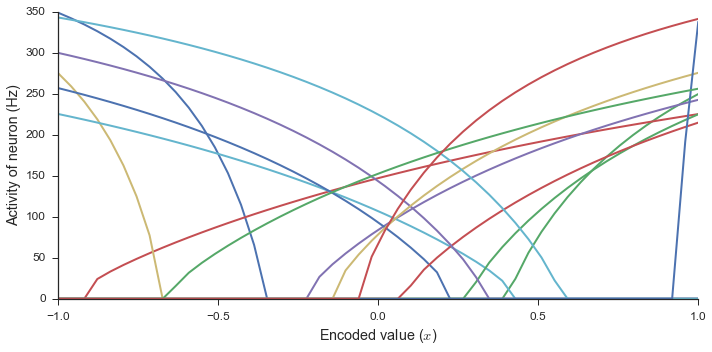

In [79]:
with nengo.Network(seed=0) as net:
    ens = nengo.Ensemble(15, dimensions=1)
sim = nengo.Simulator(net)

plt.plot(*nengo.utils.ensemble.tuning_curves(ens, sim))
plt.ylabel("Activity of neuron (Hz)")
plt.xlabel("Encoded value ($x$)")

prettify()
plt.savefig('img/neuralcode.svg')

# Neural code $\approx$ binary code

<div class="fragment fade-out" data-fragment-index="1">

<img src="img/binarycode.svg" class="center" width="80%">

</div>

<div class="fragment fade-in" data-fragment-index="1" style="position:relative; top:-350px;">

<img src="img/neuralcode.svg" class="center" width="80%">

</div>

Let's visualize this another way.
First, binary coding.
On the x-axis, we have the possible encoded values.
On the y-axis, the 'activity' of each bit.
So, the most obvious is bit 0,
which alternates for each encoded value.
If you think about each encoded value,
we can recover it by
weighting the values and summing them.
*e.g.*
Now, neural coding.
On the x-axis, we again have the possible encoded values.
On the y-axis, the 'activity' of each neuron,
measured in the firing rate.
If we look at a value,
say 0.5,
we have a particular profile of activity
that is indicative of the value 0.5.
We figure out a single set of weights
so that, no matter what value we're trying to decode,
doing this weighted sum always gives us back
the encoded value.

This type of code lets us scale up neural simulation
by specifying out models in terms of
the information we want to represent.
Which brings me to my last analogy.

# Nengo is a *neural compiler*

<div class="fragment fade-out" data-fragment-index="1">

<code><pre>
int x = 3;
int y = x * x;
printf("%d squared is %d", x, y);
</pre></code>

$$\quad$$
    
$$\Downarrow$$

$$\quad$$

<code><pre>
...
	subq	$16, %rsp
	leaq	L_.str(%rip), %rdi
	movl	$3, -4(%rbp)
	movl	-4(%rbp), %eax
	imull	-4(%rbp), %eax
	movl	%eax, -8(%rbp)
	movl	-4(%rbp), %esi
	movl	-8(%rbp), %edx
	movb	$0, %al
	callq	_printf
	movl	$0, %edx
	movl	%eax, -12(%rbp)
...
</pre></code>

</div>

<div class="fragment fade-in" data-fragment-index="1" style="position:relative; top:-420px;">

<code><pre>
val = Node(output=0.3)
x = Ensemble(n_neurons=40, dimensions=1)
squared = Ensemble(n_neurons=40, dimensions=1)
Connection(val, x)
Connection(x, squared, function=lambda x: x * x)
</pre></code>
    
$$\quad$$
    
$$\Downarrow$$

$$\quad$$

<img src="img/network.svg" class="center" width="60%">

</div>

Nengo is a neural compiler.

In computing, compilers allow us to write
programs in an understandable high-level language,
to be later compiled into machine code,
which is specific to your hardware.
Think about what the state of computing would be now
if we still had to program by typing in machine code.

Similarly, Nengo allows us to define
models in terms of what information is represented,
and how it's transformed.
Nodes are representations that is not neural,
so they're analogous to the current we injected earlier,
and Ensembles are populations of neurons
that collectively represent information.
When we connect a node to an ensemble,
we're determining the current that should be
injected into each cell such that
it represents the high-level value.
When we connect two ensembles together,
we're determining all of the connection weights
between the two populations such that
the second population represents
the value represented in the first population,
fed to this function.

Nengo gives us a level of abstraction,
like compilers do in computing.
Instead of having to determine
what currents should be injected in these cells,
and what weights should be used
to connect all of these neurons,
we instead say what information
should be represented, and how
those representations should be transformed.

In [70]:
import nengo

with nengo.Network(seed=1) as net:
    val = nengo.Node(output=0.3)
    x = nengo.Ensemble(40, dimensions=1)
    squared = nengo.Ensemble(40, dimensions=1)
    nengo.Connection(val, x)
    nengo.Connection(x, squared, function=lambda x: x * x)
    
    x_probe = nengo.Probe(x, synapse=0.03)
    sq_probe = nengo.Probe(squared, synapse=0.03)
    # Do spikes here too

In [71]:
sim = nengo.Simulator(net)
sim.run(1.0)

Simulation finished in 0:00:01.                                                 


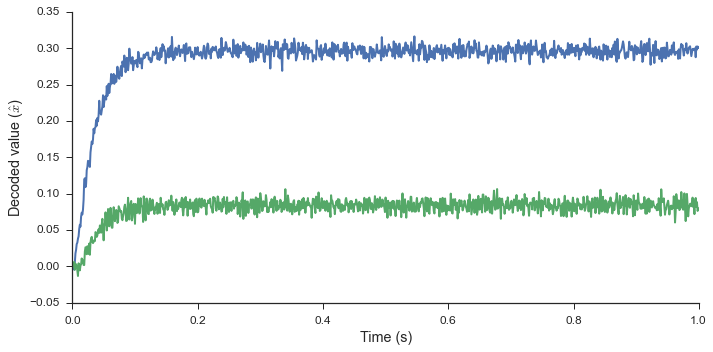

In [72]:
plt.plot(sim.trange(), sim.data[x_probe])
plt.plot(sim.trange(), sim.data[sq_probe])
plt.ylabel("Decoded value ($\hat{x}$)")
plt.xlabel("Time (s)")
prettify()

In [73]:
val.output = lambda t: np.sin(t * 2 * np.pi)

Simulation finished in 0:00:01.                                                 


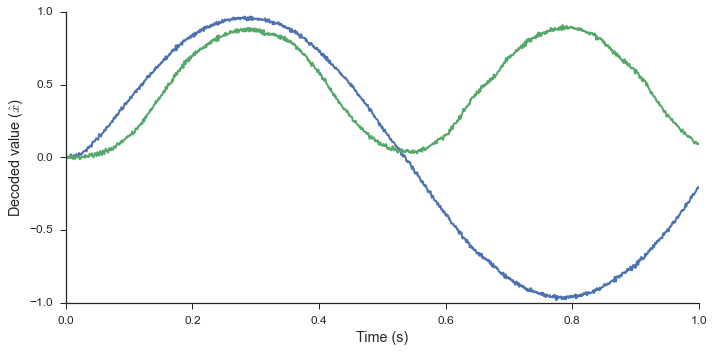

In [74]:
sim = nengo.Simulator(net)
sim.run(1.0)
plt.plot(sim.trange(), sim.data[x_probe])
plt.plot(sim.trange(), sim.data[sq_probe])
plt.ylabel("Decoded value ($\hat{x}$)")
plt.xlabel("Time (s)")
prettify()

In [75]:
with net:
    v_pr = nengo.Probe(x.neurons[0], 'voltage')
    sp_pr = nengo.Probe(x.neurons, 'spikes')

Simulation finished in 0:00:01.                                                 


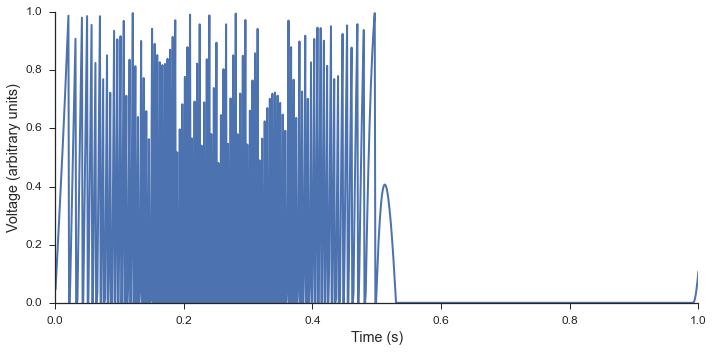

In [76]:
sim = nengo.Simulator(net)
sim.run(1.0)
plt.plot(sim.trange(), sim.data[v_pr])
plt.ylabel("Voltage (arbitrary units)")
plt.xlabel("Time (s)")
prettify()

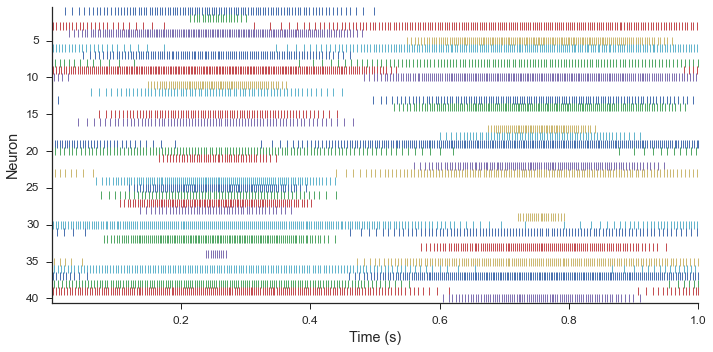

In [77]:
rasterplot(sim.trange(), sim.data[sp_pr])
plt.ylabel("Neuron")
plt.xlabel("Time (s)")
prettify()

Let's actually run this example.
The code is as you saw it before;
the Network object is just a way
of organizing models.
So we create the node and both ensembles
in this network,
then connect them together.
To get data from them, we add probes.
To run them, we create a simulator object,
and pass in the network.
Then after we run it, the data is available
in a dictionary, `sim.data`,
and we can plot it.

One big difference between this type of computing
and traditional computing
is that it's very dynamic;
it's unusual to represent an unchanging value.
So let's change this from representing
a number, to representing a sine wave.
*run*

These plots don't look like what we've plotted before,
so let me just prove that we are implementing
this math with neurons.
We can probe the voltages of a single neuron,
and the spikes from all of the neurons.
*run*

<div class="fragment">
  <video preload="auto">
    <source src="img/spaun.mp4" type="video/mp4">
    Your browser does not support the video tag.
  </video>
</div>

In [ ]:
with network:
    bg = nengo.networks.BasalGanglia(dimensions=4)

http://nengo.ca/build-a-brain/spaunvideos
$\quad\cdot\quad$
<a href="http://www.amazon.com/How-Build-Brain-Architecture-Architectures/dp/0199794545/">
  <img src="img/htbab.jpg" class="inline" width="150">
</a>
$\quad\cdot\quad$
http://nengo.ca

There's a lot more to Nengo and the NEF,
but those two analogies --
that it's a neural compiler
that represents information
analogously to binary coding --
are really the fundamentals.
These two ideas, plus a few more ideas,
plus a decade or so of research,
has led to models of working memory,
motor control, vision,
all respecting the constraints of biology
but actually working.
We put all of these models together
into a huge model called Spaun,
which I don't have time to go into a lot of detail on.

But one thing I want to highlight is
another way in which Nengo
allows us to scale up to larger,
more complex models.
An integral part of Spaun
is called the Basal Ganglia,
which is a set of brain areas
that selects one action
out of a set of possible actions.
Designing the basal ganglia
was several weeks of research,
but now it's possible for
anyone to include it in their neural
models with this single line of code.

If you're interested in this model,
Spaun, you can see more at this URL.
If you're interested in how it works,
I encourage you to pick up the book
How to Build a Brain by my supervisor,
Chris Eliasmith.
And if you're interested in learning more
about Nengo, head to nengo.ca.

In [48]:
%%writefile oscillator.py

import nengo
import nengo_viz
import numpy as np

model = nengo.Network('Oscillator', seed=0)

tau = 0.01
r = 4

def feedback(x):    
    return [-tau*r*x[1]+1.01*x[0], tau*r*x[0]+1.01*x[1]]

def osc_shape(x):
    theta = np.arctan2(x[1], x[0])
    r = 2 - 2 * np.sin(theta) + np.sin(theta)*np.sqrt(np.abs(np.cos(theta)))/(np.sin(theta)+1.4)
    return -r*np.cos(theta), r*np.sin(theta)

with model:
    stim = nengo.Node(0)
    oscillator = nengo.Ensemble(1000, dimensions=2)
    shape = nengo.Ensemble(100, dimensions=2, radius=4)
    
    nengo.Connection(stim, oscillator[0])
    nengo.Connection(stim, oscillator[1])
    nengo.Connection(oscillator, oscillator, function=feedback, synapse=tau)
    nengo.Connection(oscillator, shape, function=osc_shape, synapse=tau)

if __name__ == '__main__':
    nengo_viz.Viz(__file__).start()

Overwriting oscillator.py


I want to finish off by showing one final example,
that uses an interactive visualizer that we've been
working on lately.
As we scale things up,
those science fiction-induced
fears might be cropping up,
so I wanted to prove that
Nengo is not going to become the next Skynet.

Here, I'm making a model with two ensembles,
one connected to itself with this `feedback` function,
and one connected to that oscillator ensemble
with this complicated `osc_shape` function.

So let's open up our interactive environment.
As things are now, nothing's happening,
but I can move this slider to change
the value in the `stim` node.
When I do that...
we get a message from the neural model.

Thanks everyone for listening.
I think I have time for a few questions?